In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
titanic=pd.read_csv('data_sets/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Standardization 
changing the scale of a feature by making its mean=0 and Std. Deviation=1
formula=(x-x.mean) /x.SD

In [5]:
data=titanic[['Pclass','Age','Fare','Survived']]
data.head()

,Pclass,Age,Fare,Survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [13]:
data['Age'].fillna(data['Age'].median(),inplace=True)
# create dependent and independent variables
y=data['Survived']
x=data.drop('Survived',axis=1)
x.head()

C:\Users\vikash arya\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500


In [14]:

# divide dependent and independent data into train test data first
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)


In [18]:
#now standardize 
#using sklearn's standard scaler here
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)  # fit_transform does both actions i.e. fit the scaler and transform the variable
x_train_scaled

array([[-1.61413602,  1.25364106, -0.07868358],
       [-0.40055118, -0.47728355, -0.37714494],
       [ 0.81303367,  0.21508629, -0.47486697],
       ...,
       [ 0.81303367,  0.90745614, -0.35580399],
       [-1.61413602, -1.1696534 ,  1.68320121],
       [-1.61413602, -0.63114352,  0.86074761]])

In [25]:
#similarly 
x_test_scaled=scaler.transform(x_test)    # here we used only transform as we have already fitted the training data into scaler
x_test_scaled[:5]

array([[ 0.81303367, -0.09263364, -0.33390078],
       [-0.40055118,  0.13815631, -0.42528387],
       [ 0.81303367, -0.7080735 , -0.47486697],
       [-0.40055118, -1.78509326,  0.00796649],
       [ 0.81303367, -1.1696534 , -0.41100201]])

In [31]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
print('means : -----','\n',x_test_scaled.mean())
print()
print('SDs : -----','\n',x_test_scaled.std())

means : ----- 
 Pclass   -0.129359
Age       0.060294
Fare     -0.036620
dtype: float64

SDs : ----- 
 Pclass    1.064922
Age       1.006549
Fare      0.759588
dtype: float64


# 2. Normalization 
Scaling the values b/w 0-1

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. ... Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true.

## (i) Min-Max Scaling
change the scale of features b/w 0-1

formula :  x'=(x-x.min)/x.max - x.min

C:\Users\vikash arya\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


<AxesSubplot:>

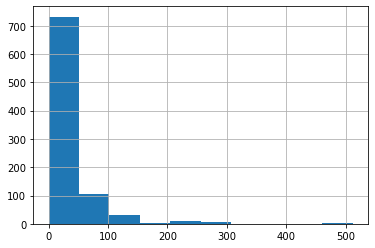

In [88]:
data=titanic[['Pclass','Age','Fare','Survived']]
data['Age'].fillna(data.median(),inplace=True)
data.Fare.hist()

In [89]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
scaled_data=pd.DataFrame(minmax.fit_transform(data),columns=data.columns)
scaled_data.head()

,Pclass,Age,Fare,Survived
0,1.0,0.271174,0.014151,0.0
1,0.0,0.472229,0.139136,1.0
2,1.0,0.321438,0.015469,1.0
3,0.0,0.434531,0.103644,1.0
4,1.0,0.434531,0.015713,0.0


## (ii) Robust Scaler
it is immune to outliers and uses IQR and median for scaling

Formula :  x'=x-median/IQR

In [90]:
from sklearn.preprocessing import RobustScaler
robust=RobustScaler()
scaled_data1=pd.DataFrame(robust.fit_transform(data),columns=data.columns)
scaled_data1.head()

,Pclass,Age,Fare,Survived
0,0.0,-0.335664,-0.312011,0.0
1,-2.0,0.559441,2.461242,1.0
2,0.0,-0.111888,-0.282777,1.0
3,-2.0,0.391608,1.673732,1.0
4,0.0,0.391608,-0.277363,0.0


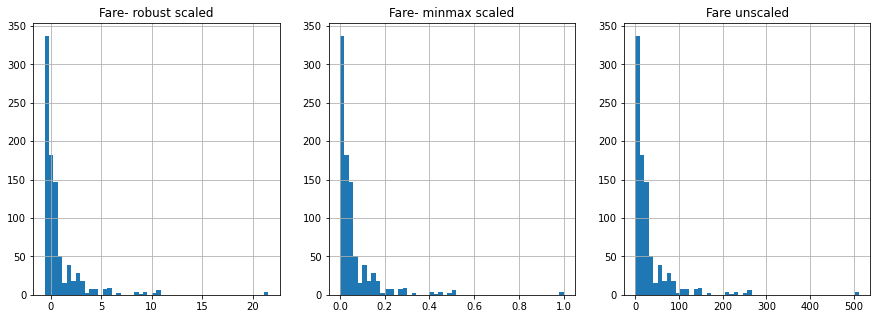

In [91]:
#plot b/w min-max scaled and robust scaled data
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
scaled_data1.Fare.hist(bins=50)
plt.title('Fare- robust scaled')
plt.subplot(1,3,2)
scaled_data.Fare.hist(bins=50)
plt.title('Fare- minmax scaled')
plt.subplot(1,3,3)
data.Fare.hist(bins=50)
plt.title('Fare unscaled')
plt.show()

# 3. Gaussian Transformation

Gaussian functions are widely used in statistics to describe the normal distributions.
Gaussian distribution is the most important probability distribution in statistics because it fits many natural phenomena like age, height, test-scores, IQ scores, sum of the rolls of two dices and so on.

##### If a data does not follow gaussian distribution then there are several methods to transform that variable distribution into gaussian distribution 
#### (i)   Log Transformation
#### (ii)  Reciprocal Transformation
#### (iii) Square root Transformation
#### (iv) Exponential Transformation
#### (v)  Boxcox Transformation

<AxesSubplot:>

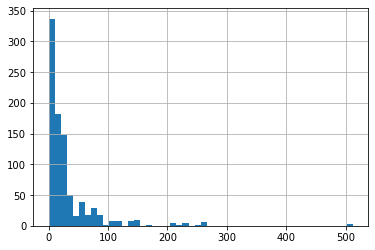

In [92]:
data.Fare.hist(bins=50)

In [93]:
# there is a method to check extent of normal distribution 
#QQ plot  In statistics, a Q–Q plot is a probability plot, which is a graphical method for comparing 
#two probability distributions by plotting their quantiles against each other.
import scipy.stats as stat
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()
    

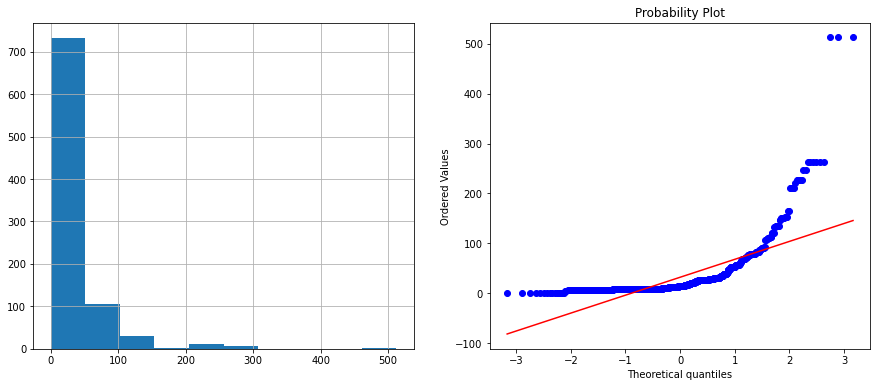

In [94]:
plot_data(data,'Fare')

## (i) Log Transformation

<ipython-input-95-1bd03a65c2d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare_log']=np.log1p(data['Fare'])


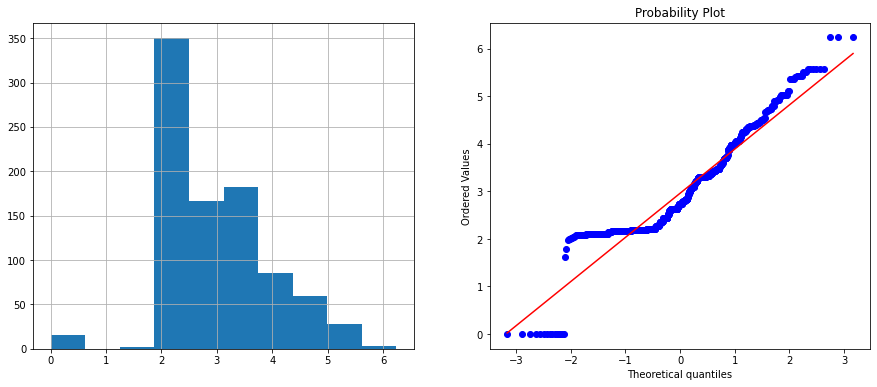

In [95]:
data['Fare_log']=np.log1p(data['Fare'])
plot_data(data,'Fare_log')

## (ii) Reciprocal Transformation

<ipython-input-96-5aa6d9af0776>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare_recip']=1/(1+data['Fare'])


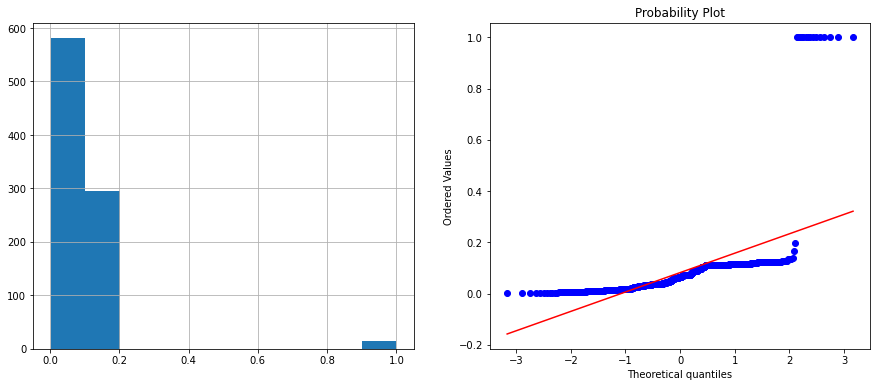

In [96]:
data['Fare_recip']=1/(1+data['Fare'])
plot_data(data,'Fare_recip')

<ipython-input-97-f951d50169e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_reciprocal']=1/data.Age


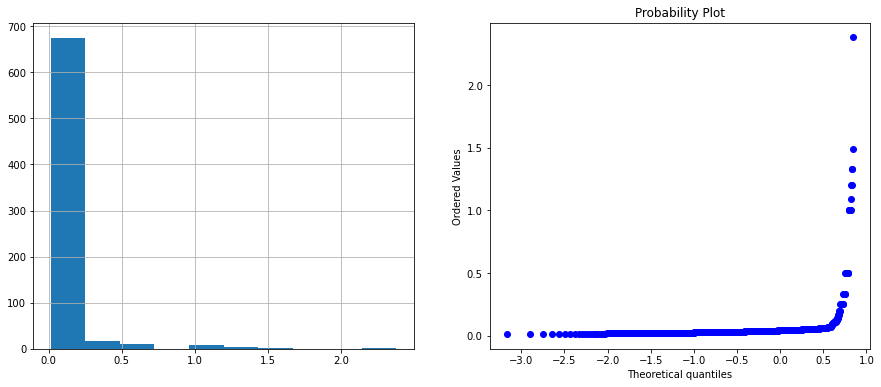

In [97]:
data['Age_reciprocal']=1/data.Age
plot_data(data,'Age_reciprocal')

## (iii) Square root Transformation

<ipython-input-98-f22cc8c0f680>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare_sqrt']=np.sqrt(data.Fare)


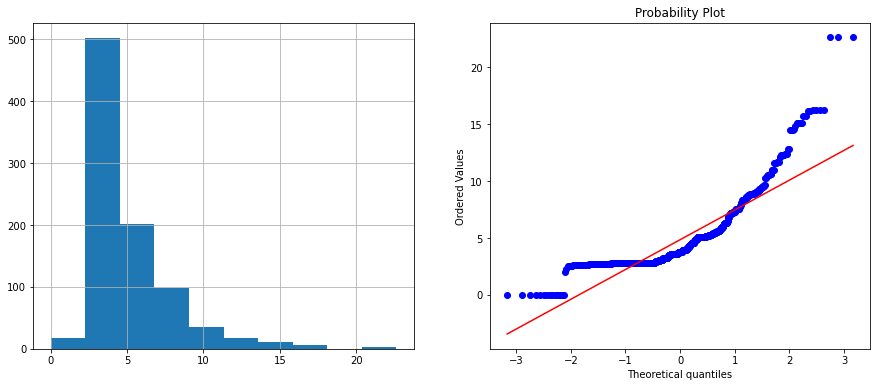

In [98]:
data['Fare_sqrt']=np.sqrt(data.Fare)
plot_data(data,'Fare_sqrt')

## (iv) Exponential Transformation

<ipython-input-99-d6058d2bb579>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare_exp']=data['Fare']**(1.5)


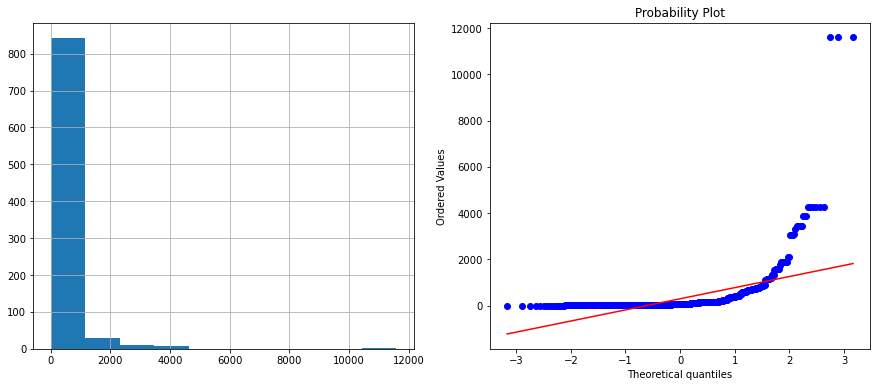

In [99]:
data['Fare_exp']=data['Fare']**(1.5)
plot_data(data,'Fare_exp')

## (v) BoxCox Transformation

T(Y)=(Y exp(lambda)-1)/lambda

<ipython-input-113-aacf7c9db897>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare_boxcox'],paramenter=stat.boxcox(data['Fare']+1)  #parameter is lambda


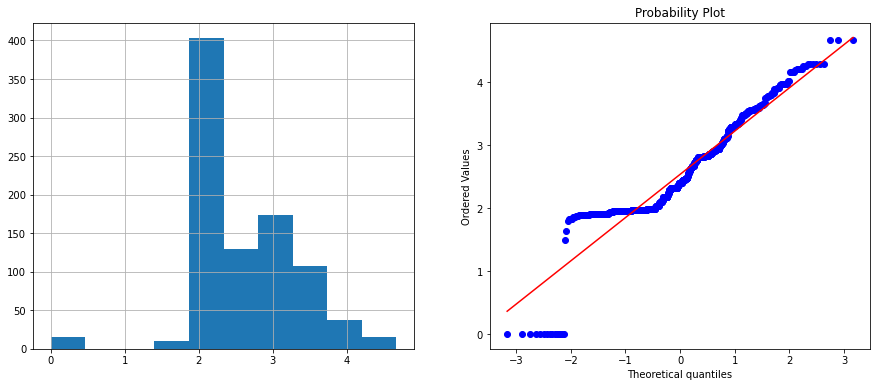

In [113]:
data['Fare_boxcox'],paramenter=stat.boxcox(data['Fare']+1)  #parameter is lambda
plot_data(data,'Fare_boxcox')